In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

### Unsupervised Learning
One main example of unsupervised learning is the k-means clustering which tries to some N number of items into K "clusters". This is akin to automatic labelling of samples in some higher dimensional space.

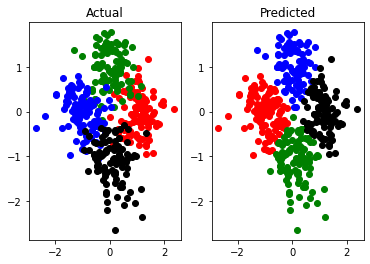

In [2]:
s = .45
a = np.vstack((np.random.normal(1, scale=s, size=100), np.random.normal(0, scale=s, size=100)))
b = np.vstack((np.random.normal(0, scale=s, size=100), np.random.normal(1, scale=s, size=100)))
c = np.vstack((np.random.normal(-1, scale=s, size=100), np.random.normal(0, scale=s, size=100)))
d = np.vstack((np.random.normal(0, scale=s, size=100), np.random.normal(-1, scale=s, size=100)))

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title('Actual')
ax2.set_title('Predicted')
ax1.scatter(a[0, :], a[1, :], c = 'r')
ax1.scatter(b[0, :], b[1, :], c = 'g')
ax1.scatter(c[0, :], c[1, :], c = 'b')
ax1.scatter(d[0, :], d[1, :], c = 'k')

comb_data = np.hstack((a, b, c, d))

# Now we want to combine this and use the K-Means Algorithm to figure out how this works
# labels : array containing labels for data points, randomly initialized
num_centroids = 4
# centroids : 2D containing centroids for the k-means algorithm
centroids = np.random.uniform(low=-1., high=1., size=(2, num_centroids))

dist = lambda v1, v2: np.linalg.norm(v1 - v2, axis=1)
num_iter = 10
for ii in range(num_iter):
    distances = np.array([dist(comb_data.T, centroids[:, jj]) 
                         for jj in range(centroids.shape[1])])
    # new_labels : computed by finding centroid with minimal distance
    labels = np.argmin(distances, axis=0)

    for c in range(num_centroids):
        # computing centroids by taking the mean over associated data points
        centroids[:, c] = np.mean(comb_data[:, labels == c], axis=1)

# Plot our final result
for ii, color in zip(range(num_centroids), ['r', 'g', 'b', 'k']):
    is_clustered = labels == ii
    ax2.scatter(comb_data[0, is_clustered], comb_data[1, is_clustered], c=color)


#### Reinforcement Learning
Reinforcement Learning generally involves having a reward that we are trying to maximize. This reward function is not always smooth or continuous. One approach is to a way to assign a "value" to each state. To update the value of each state, we follow the Bellman Equation. For this simple problem, we know each state. For very complex problems, this might be impossible and the value function is approximated using a neural network.

For the following example, we will be finding a path from left to right that maximizes our reward. Adapted from course material for EE 473

<img src="RL_example.png" width="350">

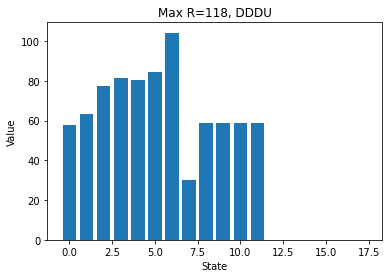

In [31]:
def plot_values(v, a, r, gamma):
     plt.bar(list(range(1+2+4+5+6)), v[:, -1])
     # Find the maximum reward from the chart
     state = 0
     total_r = 0
     a_hist = ''
     for t in range(4):
          a_v = a[state]
          r_v = r[state]
          max_a_idx = np.argmax(r_v+gamma*v[a_v, -1])
          total_r += r_v[max_a_idx]
          state = a_v[max_a_idx]
          if max_a_idx == 0:
               a_hist += 'U'
          else:
               a_hist += 'D'

     plt.title(f'Max R={total_r}, {a_hist}')
     plt.ylabel('Value')
     plt.xlabel('State')

v = np.zeros((1+2+4+5+6,11)) # 11 columns since v[:, 0] = 0
# Intializing a reward/action array for each value position
# Possible next positions from the current position on the array
a = [[1,2], 
     [3,4], [5, 6],
     [7, 8], [8, 9], [9, 10], [10, 11],
     [12, 13], [13, 14], [14, 15], [15, 16], [16, 17],
     [12],[13],[14],[15],[16],[17]]
# Reward for up or down movement, column 0 and 1 respectively
r = [[1,0], 
     [0,3], [2, -1],
     [59, 36], [36, 30], [30, 40], [40, 60],
     [30, -4], [-4, 59], [59, 30], [30, 59], [59, 29],
     [0],[0],[0],[0],[0],[0]]

# Perform value iterations
gamma = .75
for t in range(10):
    for ii, (a_v, r_v) in enumerate(zip(a, r)):
        v[ii, t+1] = max(r_v + gamma*v[a_v, t])

plot_values(v, a, r, gamma)

### How do we update/train a neural network? 
#### Backpropagation

<img src="Backprog_simple.png" width="350">

Say that we want O1 to become a equivalent model for X1 - X2. How do we tune the weights from the "experimental" data?

<img src="backprog_simple_eqn.png" width="400">

Text(0, 0.5, 'Error')

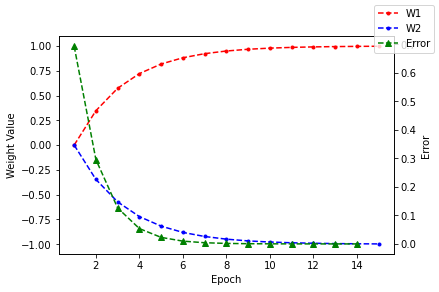

In [17]:
x1_in, x2_in = np.meshgrid(np.linspace(-1,1), np.linspace(-1,1))
obsv_in = np.vstack((x1_in.flatten(), x2_in.flatten()))
obsv_out = obsv_in[0, :] - obsv_in[1, :] 

epochs = 15
eta = .5 # Learning Rate
weights = np.zeros((2, epochs))
loss = np.zeros(epochs-1)
for ii in range(epochs-1):
    pred = np.dot(weights[:, ii], obsv_in)
    loss[ii] = np.sum(np.power(obsv_out-pred, 2)) / pred.size
    err = -2*(obsv_out-pred)*obsv_in
    update = eta * np.sum(err, axis=1) / pred.size
    weights[:, ii+1] = weights[:, ii] - update

# Weight updates
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
epoch_num = np.arange(1, epochs+1)
ax1.plot(epoch_num, weights[0], 'r.--', label='W1')
ax1.plot(epoch_num, weights[1], 'b.--', label='W2')
ax2.plot(np.arange(1, epochs), loss, 'g^--', label='Error')
fig.legend()
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Weight Value')
ax2.set_ylabel('Error')

#### Approximating more complex functions

Text(0, 0.5, 'Output')

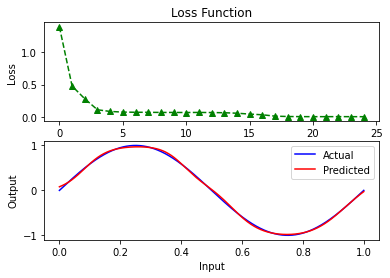

In [75]:
x_in = np.linspace(0, 1, 1000)
obsv_out = np.sin(x_in * 2 * np.pi)

func_approx = tf.keras.Sequential([tf.keras.Input(shape=1),
                                  tf.keras.layers.Dense(50, activation='sigmoid'),
                                  tf.keras.layers.Dense(25, activation='sigmoid'),
                                  tf.keras.layers.Dense(1, activation='linear')])
func_approx.compile(tf.keras.optimizers.Adam(lr=.1), tf.keras.losses.MSE)
hist = func_approx.fit(x_in, obsv_out, epochs=25, verbose=0)
# Weight updates
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(hist.epoch, hist.history['loss'], 'g^--', label='Error')
ax1.set_title('Loss Function')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
# Get new prediction
model_in = tf.convert_to_tensor(np.expand_dims(x_in, axis=1), dtype=tf.float32)
ax2.plot(x_in, obsv_out, 'b', label='Actual')
ax2.plot(x_in, func_approx(model_in), 'r', label='Predicted')
ax2.legend()
ax2.set_xlabel('Input')
ax2.set_ylabel('Output')

### MNIST Dataset
We can use neural networks for image classification.

Adapted from https://www.tensorflow.org/datasets/keras_example

Epoch 1/6
469/469 [==============================] - 9s 19ms/step - loss: 0.3467 - sparse_categorical_accuracy: 0.9052 - val_loss: 0.1903 - val_sparse_categorical_accuracy: 0.9465
Epoch 2/6
469/469 [==============================] - 2s 4ms/step - loss: 0.1611 - sparse_categorical_accuracy: 0.9541 - val_loss: 0.1334 - val_sparse_categorical_accuracy: 0.9622
Epoch 3/6
469/469 [==============================] - 2s 4ms/step - loss: 0.1142 - sparse_categorical_accuracy: 0.9670 - val_loss: 0.1076 - val_sparse_categorical_accuracy: 0.9692
Epoch 4/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0886 - sparse_categorical_accuracy: 0.9744 - val_loss: 0.0948 - val_sparse_categorical_accuracy: 0.9727
Epoch 5/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0717 - sparse_categorical_accuracy: 0.9789 - val_loss: 0.0847 - val_sparse_categorical_accuracy: 0.9751
Epoch 6/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0594 - sparse_categorical_acc

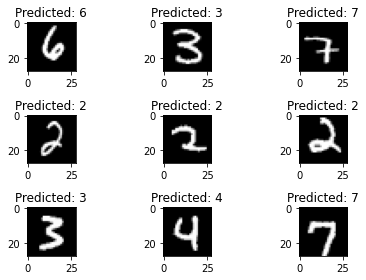

In [20]:
# Getting the dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
# Getting the training dataset
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(normalize_img)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)
# Getting the testing dataset
ds_test = ds_test.map(normalize_img)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

# Plotting a couple of images
to_plot = ds_test.take(1)
fig, axs = plt.subplots(3,3)
for batch in enumerate(to_plot):  
  for ii in range(9):
    img = batch[1][0][ii, :, :, 0]
    axs[ii//3, ii%3].imshow(img, cmap=plt.get_cmap('gray'))
    pred = model(tf.expand_dims(batch[1][0][ii, :, :],0))
    axs[ii//3, ii%3].set_title(f'Predicted: {tf.math.argmax(pred, axis=1).numpy()[0]}')
plt.tight_layout()

#### Predicting time series data (RNN)
By having multiple time steps as inputs, we can predict future behavior. They have "memory" whereas the networks we saw before assumed that inputs and outputs are independent. Of course, this requires a different backpropagation scheme call "backpropagation through time." As with very deep networks, gradients can either explode (approach infinity) or vanish (approaches 0).

For this example, we will predict a more complex time series input. Adapted from https://medium.com/analytics-vidhya/recurrent-neural-networks-rnns-and-time-series-forecasting-d9ea933426b3

Train on 700 samples, validate on 300 samples
Epoch 1/20
700/700 [==============================] - 2s 3ms/sample - loss: 0.3486 - val_loss: 0.2744
Epoch 2/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.2325 - val_loss: 0.2016
Epoch 3/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.1792 - val_loss: 0.1688
Epoch 4/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.1531 - val_loss: 0.1515
Epoch 5/20
700/700 [==============================] - 1s 993us/sample - loss: 0.1372 - val_loss: 0.1397
Epoch 6/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.1251 - val_loss: 0.1278
Epoch 7/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.1121 - val_loss: 0.1116
Epoch 8/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.0957 - val_loss: 0.0928
Epoch 9/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.0806 - val_loss: 0.0785
Epoch 10/20
700/700 [=============

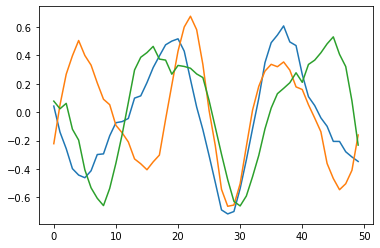

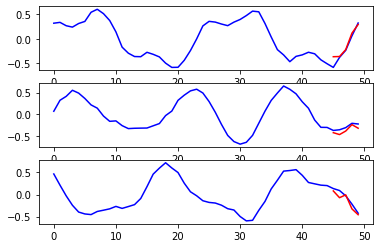

In [56]:
n_steps = 50
batch_size = 1000
freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
time = np.linspace(0, 1, n_steps)
series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))    # +wave 1
series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))   # +wave 2
series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)     # +noise
series=np.expand_dims(series, axis=2)
series = np.float32(series)

fig, ax = plt.subplots()
# Plot the first 3 randomly generated sequences
for ii in range(3):
    ax.plot(series[ii, :])

# Make Data for testing
X_train, y_train = series[:700, :n_steps-5], series[:700, -5:]
X_valid, y_valid = series[700:, :n_steps-5], series[700:, -5:]

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(5, input_shape=[None, 1])
])
optimizer = tf.keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

fig, axs = plt.subplots(3, 1)
# Plot the first 3 randomly generated sequences
for ii in range(3):
    axs[ii].plot(series[700+ii, :], 'b', label='actual')
    pred = model(np.expand_dims(series[700+ii, :n_steps-5], axis=0)).numpy().flatten()
    axs[ii].plot(np.arange(n_steps-5, n_steps), pred, 'r', label='predicted')